In [1]:

import seaborn as sns               
sns.set(color_codes=True)


#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
import csv    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Getting the dataset and displaying it :
df = pd.read_csv('/content/gdrive/My Drive/Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Cleaning**

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the look of it, we can presume that the dataset contains several numerical and categorical columns providing various information on the customers.

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The dataset contains 10000 rows and 14 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There seem to be no missing values in this dataset.

In [7]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

We can clearly see that the dataset in imbalanced with a high proportion of active customers compared to their churned counterparts.

In [8]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
#Renaming the column names :
new_name = {'HasCrCard':'HasCreditCard',
           'Exited':'Churn'}
df.rename(columns = new_name, inplace = True)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
row = df["RowNumber"]
df = df.drop(columns=['RowNumber'])

In [11]:
df.shape

(10000, 13)

In [12]:
#Duplicate rows :
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


# **Data Evaluation**


In [13]:
#Replacing the value of the rows :
replace_values = {0: 'No',
                 1: 'Yes'}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


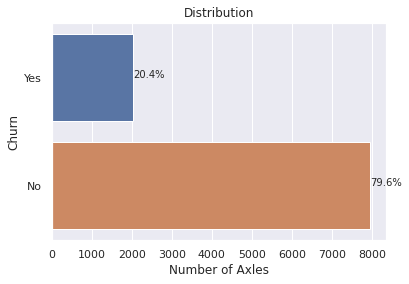

In [14]:
#Plot of Churn Distribution
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

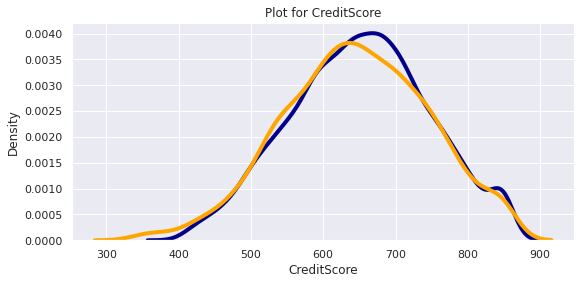

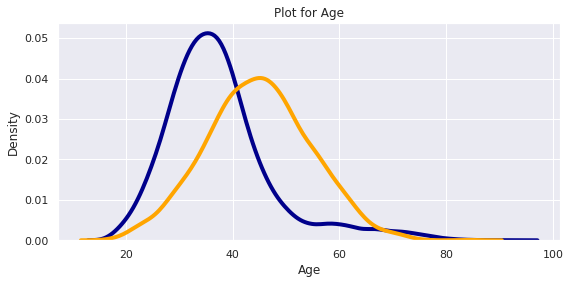

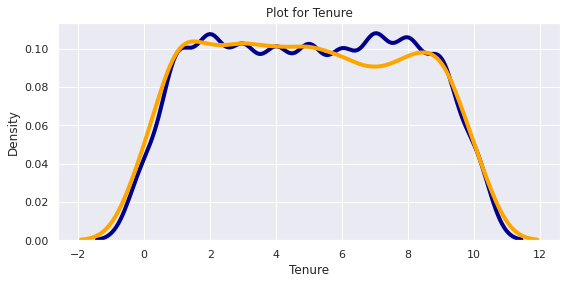

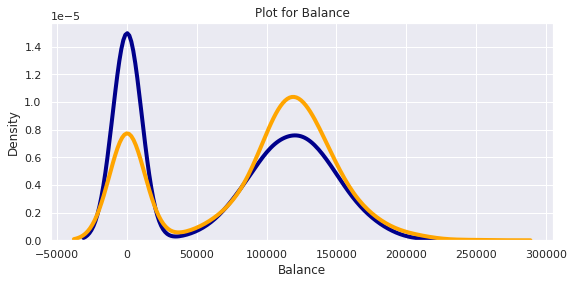

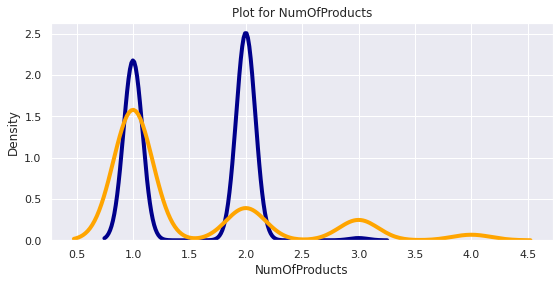

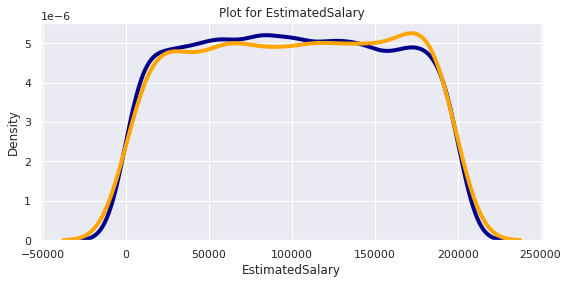

In [15]:
#Numerical features
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.savefig('kde.png')
kdeplot('CreditScore', hist = False, kde = True)
kdeplot('Age', hist = False, kde = True)
kdeplot('Tenure', hist = False, kde = True)
kdeplot('Balance', hist = False, kde = True)
kdeplot('NumOfProducts', hist = False, kde = True)
kdeplot('EstimatedSalary', hist = False, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


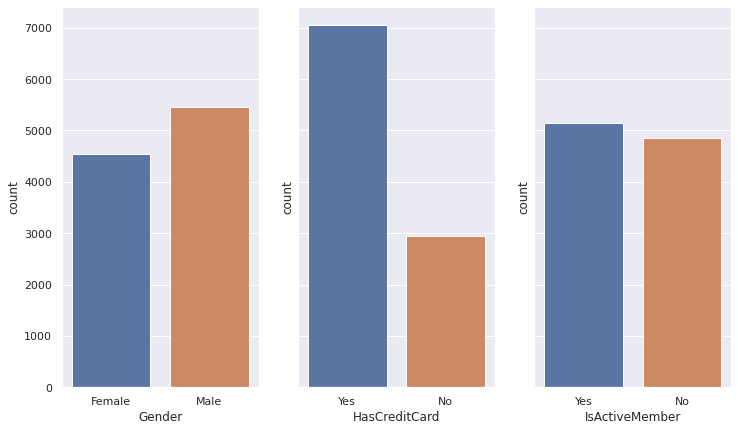

In [16]:
#Binary Features
fig, axes = plt.subplots(1, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0])
sns.countplot("HasCreditCard", data=df, ax=axes[1])
sns.countplot("IsActiveMember", data=df, ax=axes[2])
fig.savefig("inp.png")

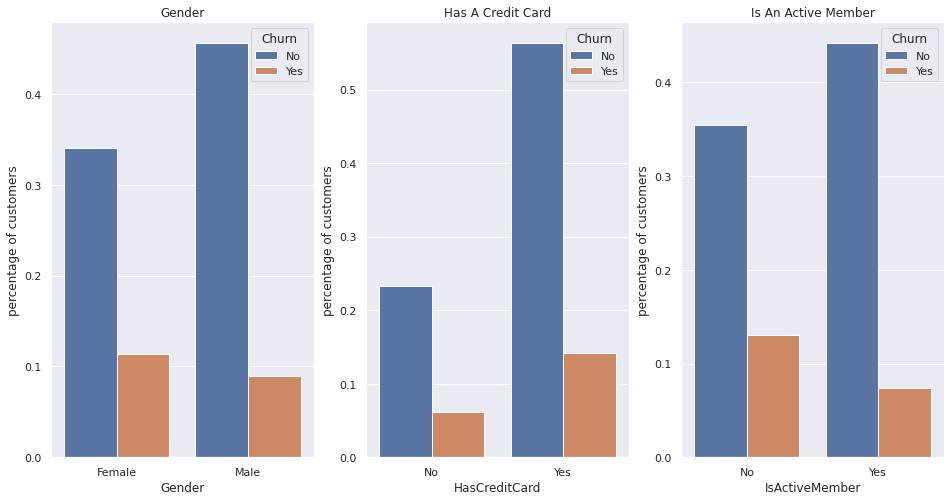

In [17]:
fig, axis = plt.subplots(1, 3, figsize=(16,8))
axis[1].set_title("Has A Credit Card")
axis[0].set_title("Gender")
axis[2].set_title("Is An Active Member")
axis_y = "percentage of customers"
# Plot HasCreditCard column
gp_HasCreditCard = df.groupby('HasCreditCard')["Churn"].value_counts()/len(df)
gp_HasCreditCard = gp_HasCreditCard.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='HasCreditCard', y= axis_y, hue='Churn', data=gp_HasCreditCard, ax=axis[1])
# Plot IsActiveMember column
gp_IsActiveMember = df.groupby('IsActiveMember')["Churn"].value_counts()/len(df)
gp_IsActiveMember = gp_IsActiveMember.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='IsActiveMember', y= axis_y, hue='Churn', data=gp_IsActiveMember, ax=axis[2])
# Plot Gender column
gp_Gender = df.groupby('Gender')["Churn"].value_counts()/len(df)
gp_Gender = gp_Gender.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Gender', y= axis_y, hue='Churn', data=gp_Gender, ax=axis[0])


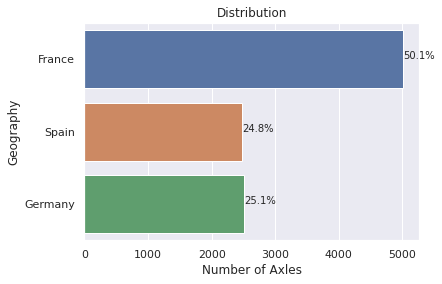

In [18]:
bar_plot(df, "Geography")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


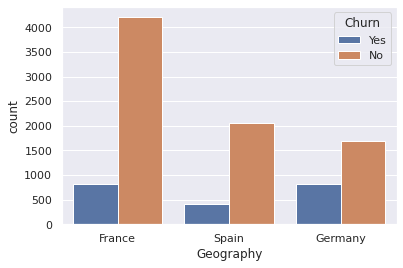

In [19]:
sns.countplot("Geography", data=df, hue = 'Churn')


> **Correlation Between Features**



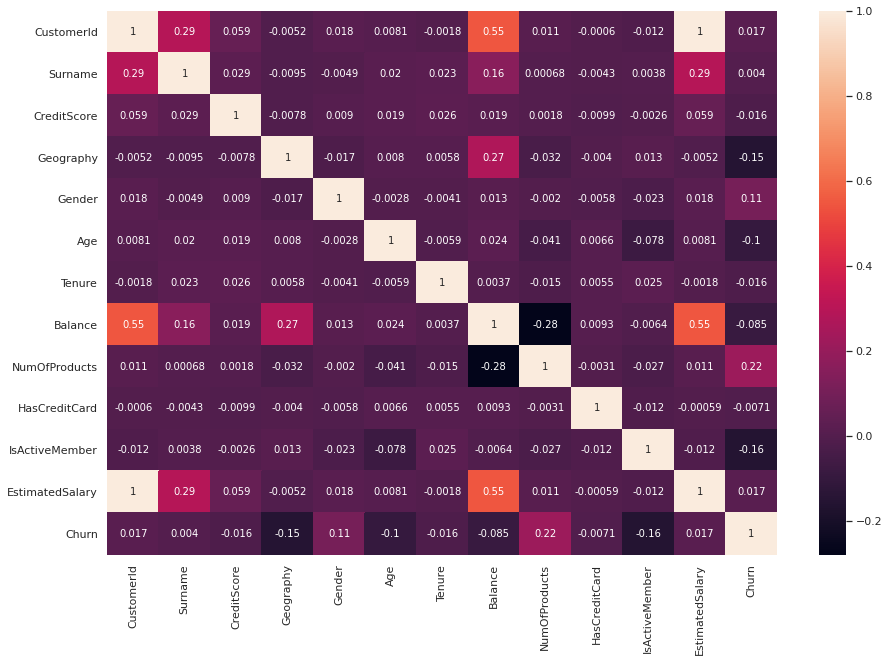

In [20]:
plt.figure(figsize=(15, 10))
df_corr = df.apply(lambda x: pd.factorize(x)[0])
sns.heatmap(df_corr.corr(), annot=True)

In [21]:
#Replacing the value of the rows :
replace_values = {'No': 0,
                 'Yes': 1}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

**Correlation with churn rate**

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

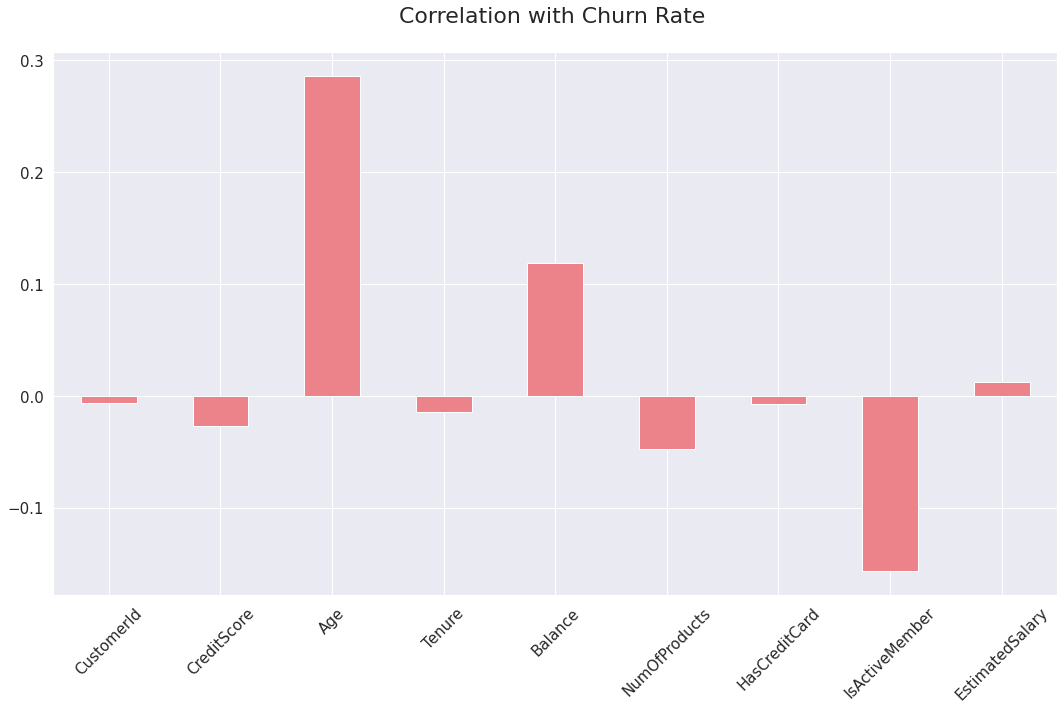

In [22]:
correlations = df.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# **Data preprocessing : Label Encoding & One  Hot Encoding**

In [23]:
'''
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing them
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
'''

"\n# Label Encoding\nfrom sklearn.preprocessing import LabelEncoder\n\n# creating instance of labelencoder\nlabelencoder = LabelEncoder()\n\n# Assigning numerical values and storing them\ndf['Geography'] = labelencoder.fit_transform(df['Geography'])\ndf['Gender'] = labelencoder.fit_transform(df['Gender'])\n"

In [24]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
# One Hot Encoding

# Get one hot encoding of column Geography
geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography')

# Get one hot encoding of column Gender
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

print(geography_dummies.head())
print(gender_dummies.head())

   Geography_France  Geography_Germany  Geography_Spain
0                 1                  0                0
1                 0                  0                1
2                 1                  0                0
3                 1                  0                0
4                 0                  0                1
   Gender_Female  Gender_Male
0              1            0
1              1            0
2              1            0
3              1            0
4              1            0


In [26]:
# Drop column Geography as it is now encoded
df.drop(['Geography'], inplace = True, axis = 1)
# Join the encoded df
df = pd.concat([df, pd.DataFrame(geography_dummies)], axis=1)

# Drop column Gender as it is now encoded
df.drop(['Gender'], inplace = True, axis = 1)
# Join the encoded df
df = pd.concat([df, pd.DataFrame(gender_dummies)], axis=1)

df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# **Oversampling Technique**

In [27]:
surname = df["Surname"]
df = df.drop(columns="Surname")

In [28]:
identity = df["CustomerId"]
df = df.drop(columns ="CustomerId")

In [29]:
from imblearn.over_sampling import SMOTE
df.head()
x=df.drop('Churn', axis=1)
y = df['Churn']
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
response = df["Churn"]
df = df.drop(columns="Churn")

# **Train Test Split**

 **Split the dataset into dependent and independent variables:**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, response,stratify=response, test_size = 0.2, random_state = 0)


In [32]:

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 13)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 13)
Number transactions y_test dataset:  (2000,)


In [33]:
#y_resampled.value_counts()

In [34]:
X_train.shape

(8000, 13)

In [35]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


# **Model Selection**

Compare Baseline Classification Algorithms (1st Iteration):

In [36]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 42,class_weight='balanced')))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 42)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

In [37]:
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_results.append(cv_acc_results)
# roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

In [38]:
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,85.43,2.07,85.95,0.98
1,Gaussian NB,74.72,1.92,78.46,1.40
0,Logistic Regression,74.66,2.23,69.20,1.03
4,Decision Tree Classifier,68.70,1.32,79.54,1.19
3,Kernel SVM,54.72,3.05,79.62,1.23


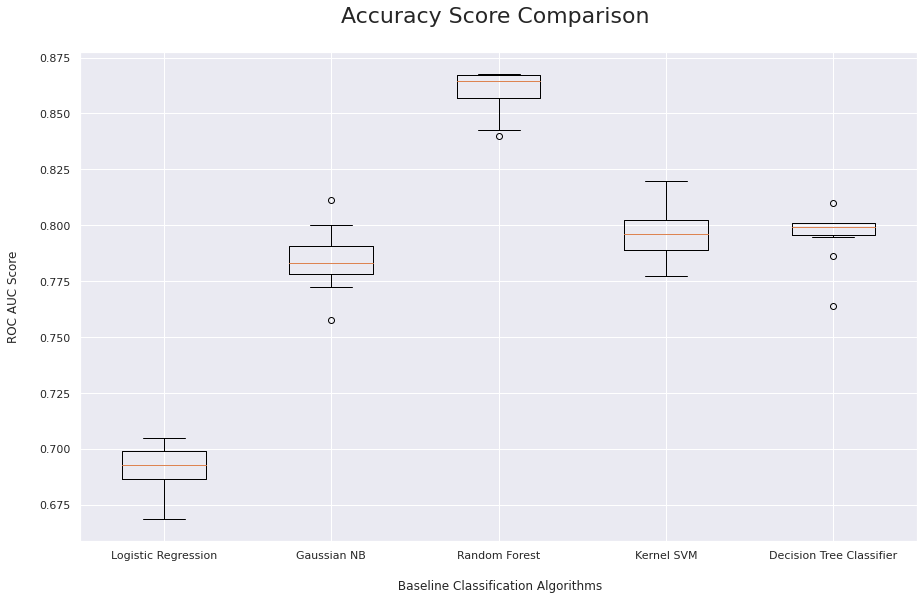

In [39]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

From the first iteration of baseline classification algorithms, we can see that Random Forest have outperformed the other models for the chosen dataset with the highest mean AUC Scores.

#**Identify the optimal number of trees for Random Forest Model**

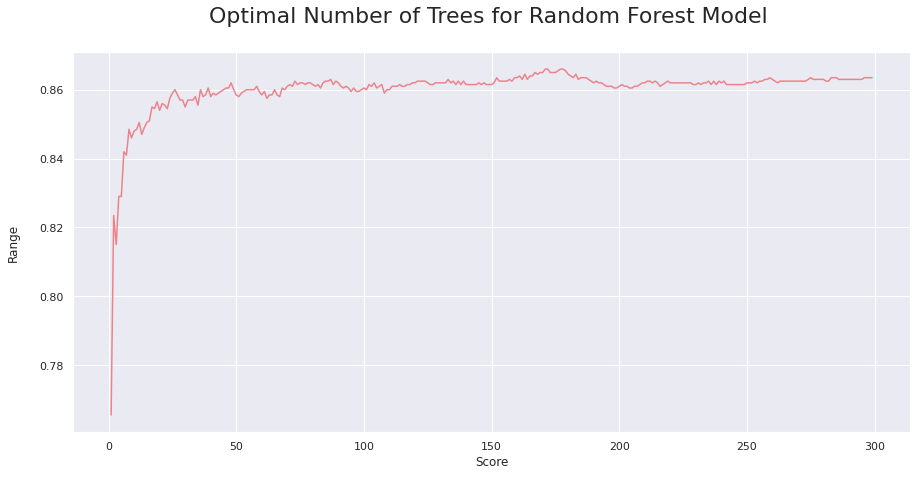

In [40]:
score_array = []
for each in range(1,300):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

x = range(1,300)
fig = plt.figure(figsize=(15, 7))
plt.plot(x,score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [41]:
score_array = np.array(score_array, dtype=np.float_)
x = np.array(x, dtype=np.int_)
order = score_array.argsort()
score_array = score_array[order]
x = x[order]
xmax = x[score_array.searchsorted(max(score_array), 'left')]
print ("Optimal number of trees for Random Forest Model:" ,xmax)

Optimal number of trees for Random Forest Model: 172


As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators is optimal

**Compare Baseline Classification Algorithms (2nd Iteration)**

In [42]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fitting Gaussian NB to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Gaussian NB', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = 172, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest    0.8625   0.777311  0.454545  0.573643  0.495713
1          Gaussian NB    0.7835   0.361702  0.083538  0.135729  0.098722
0  Logistic Regression    0.7855   0.347222  0.061425  0.104384  0.073529


From the 2nd iteration, we can definitely conclude that **Random Forest** is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Random Forest and evaluate its performance in the forthcoming sections.

# **Random Forest**

## **Model**

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=54, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

Training set accuracy:  0.99950
Test set accuracy:  0.86200


In [44]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

## **Evaluation**

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

0.862


<Figure size 2016x1440 with 0 Axes>

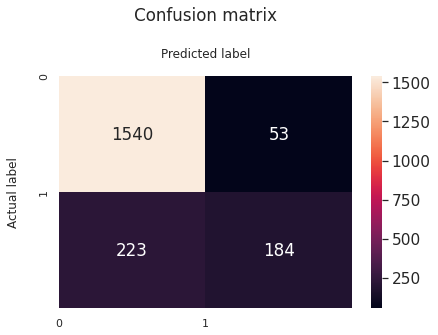

In [45]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

#**Analyzing Coefficients**

In [46]:
importance = rf.feature_importances_
feature_importances = pd.concat([pd.DataFrame(df.columns, columns = ["features"]),pd.DataFrame(np.transpose(importance), columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
1,Age,0.244720
7,EstimatedSalary,0.145065
0,CreditScore,0.140519
3,Balance,0.139921
4,NumOfProducts,0.131484
2,Tenure,0.083140
6,IsActiveMember,0.037336
9,Geography_Germany,0.022539
5,HasCreditCard,0.018955
12,Gender_Male,0.009501


The Random Forest model predicts that the churn rate would significantly increase positively with age, estimated salary, credirt score, balance and number of products.


#**Format Final Results**

In [47]:
#Rejoin surname and identity to dataset:
df = pd.concat([df, identity], axis = 1)
df = pd.concat([df, surname], axis = 1)

In [48]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CustomerId,Surname
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,15634602,Hargrave
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,15647311,Hill
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,15619304,Onio
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,15701354,Boni
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,15737888,Mitchell


In [49]:
# Predict the Test set results
y_pred = rf.predict(X_test)
#probability score
y_pred_probs = rf.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [50]:
final_results = pd.concat([identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['CustomerId', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      CustomerId  Churn  predictions  propensity_to_churn(%) Ranking
1       15647311    0.0            0                    3.80       8
11      15737173    0.0            0                   11.11       6
27      15700772    0.0            0                    3.70       8
31      15706552    0.0            1                   79.63       1
32      15750181    0.0            0                   39.11       2
...          ...    ...          ...                     ...     ...
9977    15579969    0.0            0                    3.70       8
9981    15672754    1.0            0                    0.00      10
9983    15656710    0.0            0                    3.70       8
9995    15606229    0.0            1                   92.59       1
9998    15682355    1.0            0                    5.56       7

[2000 rows x 5 columns]


#**Save the module**

In [51]:
churn_model = "churn_model.pkl"  
i = [rf]
joblib.dump(i,churn_model)

['churn_model.pkl']